<a href="https://colab.research.google.com/github/uomerozkaya/Data-Mining/blob/main/DataMining_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**R kare**, modeldeki bağımsız değişkenlere göre bağımlı değişkenin varyasyon oranını yani bağımlı değişkendeki değişkenliğin ne kadarının model tarafından açıklanabileceğini ölçer. Korelasyon katsayısının karesidir. R Kare aşırı uyum (overfitting) sorununu dikkate almaz. Regresyon modelinin çok fazla bağımsız değişkeni varsa model eğitim verilerine çok iyi uyabilir ama testte istenen başarıyı gösteremeyebilir. Bu nedenle Düzeltilmiş R Kare kullanılır. Düzeltilmiş R Kare modele eklenen ek bağımsız değişkenleri cezalandırır ve aşırı uyum sorununu çözer.

**Ortalama mutlak hata**, mutlak hata değerinin toplamını alır, hata terimlerinin toplamının daha doğrudan bir temsilidir.
Ortalama Mutlak Hatayı “from sklearn.metrics import mean_absolute_error” kütüphanesini ekleyerek kolay bir şekilde hesaplayabiliriz. Fonksiyonun aldığı ilk parametre gerçek değerler ikinci parametre ise bizim tahmin ettiğimiz değerler oluyor.

**Ortalama Kare Hatası** tahmin edilen sonuçlarınızın gerçek sayıdan ne kadar farklı olduğuna dair size mutlak bir sayı verir. Tek bir sonuçtan çok fazla içgörü yorumlayamazsınız, ancak size diğer model sonuçlarıyla karşılaştırmak için gerçek bir sayı verir ve en iyi regresyon modelini seçmenize yardımcı olur. Kök Ortalama Karekök Hatası (RMSE), MSE’nin kareköküdür. MSE’den daha sık kullanılır çünkü bazen MSE değeri kolayca karşılaştırılamayacak kadar büyük olabilir. Bu yüzden MSE hata karesi ile hesaplanır ve böylece yorumlamayı kolaylaştırır. Fakat MSE aykırı değerlere karşı çok duyarlıdır.

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Data İnformation

In [346]:
import pandas as pd
sf = pd.read_csv('Real estate.csv')
sf.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [347]:
#check for nulls in the data
sf.isnull().sum() 

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

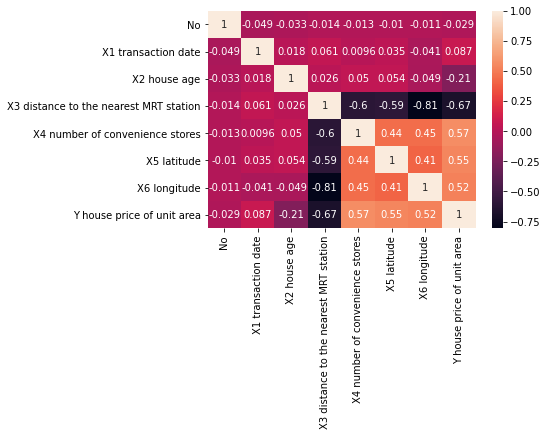

In [348]:
# check for any correlations between variables
corr = sf.corr()
sns.heatmap(corr, annot=True)
# sqft_living, grade, sqft_above and sqft_living15 seem to have a 
# high influence in price

# Normalizing the data

In [349]:
#normalizing the data:
from sklearn import preprocessing
a_nor=preprocessing.normalize(sf)
a_nor=pd.DataFrame(a_nor)
a_nor
a_nor.columns=sf.columns
a_nor

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.000495,0.996909,0.015848,0.042037,0.004953,0.012373,0.060194,0.018770
1,0.000980,0.986502,0.009557,0.150258,0.004411,0.012243,0.059565,0.020682
2,0.001432,0.961229,0.006349,0.268276,0.002387,0.011928,0.058022,0.022580
3,0.001909,0.961141,0.006349,0.268263,0.002387,0.011928,0.058019,0.026159
4,0.002434,0.979673,0.002434,0.190095,0.002434,0.012158,0.059156,0.020977
...,...,...,...,...,...,...,...,...
409,0.089685,0.440334,0.002997,0.892920,0.000000,0.005456,0.026578,0.003369
410,0.199460,0.976753,0.002718,0.043899,0.004368,0.012120,0.058985,0.024265
411,0.196565,0.960519,0.008969,0.186531,0.003340,0.011918,0.057987,0.019370
412,0.200288,0.976223,0.003928,0.050829,0.002425,0.012108,0.058942,0.025460


In [350]:
#splitting x and y:
x=a_nor.iloc[:,2:7]
x

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.015848,0.042037,0.004953,0.012373,0.060194
1,0.009557,0.150258,0.004411,0.012243,0.059565
2,0.006349,0.268276,0.002387,0.011928,0.058022
3,0.006349,0.268263,0.002387,0.011928,0.058019
4,0.002434,0.190095,0.002434,0.012158,0.059156
...,...,...,...,...,...
409,0.002997,0.892920,0.000000,0.005456,0.026578
410,0.002718,0.043899,0.004368,0.012120,0.058985
411,0.008969,0.186531,0.003340,0.011918,0.057987
412,0.003928,0.050829,0.002425,0.012108,0.058942


In [351]:
y=sf.iloc[:,7:8]
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


# LinearRegression

In [352]:
#splitting training and test data set:
from sklearn import model_selection
from sklearn import linear_model
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)
x_train.shape
x_test.shape
y_train.shape
y_test.shape
x_train

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
135,0.008365,0.446675,0.000000,0.011049,0.053796
187,0.002415,0.835344,0.000000,0.006772,0.032990
60,0.003938,0.691346,0.000716,0.008937,0.043501
320,0.002892,0.899224,0.000000,0.005343,0.026031
102,0.000542,0.095384,0.002956,0.012301,0.059886
...,...,...,...,...,...
122,0.015265,0.201091,0.001938,0.012107,0.058903
25,0.011688,0.593539,0.000798,0.009963,0.048476
246,0.007923,0.188336,0.002899,0.012061,0.058721
61,0.002603,0.127541,0.002947,0.012268,0.059701


In [353]:
#applying linear regression:
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)
model.coef_
model.intercept_
pred=lm.predict(x_train)

In [354]:
#checking accuracy using r2:
from sklearn.metrics import r2_score
r2_score(pred,y_train)
predd=lm.predict(x_test)
preddt=lm.predict(x_train)
r2_score(predd,y_test)

0.5609625953809626

In [355]:
lr2 = r2_score(predd,y_test)
lr2

0.5609625953809626

In [356]:
lr2t = r2_score(preddt,y_train)
lr2t

0.45227379028697134

for test data

In [357]:
lmae = mean_absolute_error(predd,y_test)
lmae

4.877922207010644

In [358]:
lmse = mean_squared_error(predd,y_test)
lmse

49.74571194990524

In [359]:
np.sqrt(mean_squared_error(predd,y_test))

7.053064011470847

for train data

In [360]:
lmaet = mean_absolute_error(preddt,y_train)
lmaet

5.29590999561157

In [361]:
lmset = mean_squared_error(preddt,y_train)
lmset

69.00198415222955

# AdaBoostRegressor

In [362]:
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, loss='exponential')
reg.fit(x_train, y_train)
prediction = reg.predict(x_test)
predictiont = reg.predict(x_train)
exp_variance_score = explained_variance_score(prediction, y_test)
print("adaBoost: r2_score:",r2_score(prediction,y_test))
print("adaBoost: mean_absolute_error for test data",mean_absolute_error(prediction,y_test))
print("adaBoost: mean_squared_error for test data",mean_squared_error(prediction,y_test))
print("adaBoost: mean_absolute_error for train data",mean_absolute_error(predictiont,y_train))
print("adaBoost: mean_squared_error for train data",mean_squared_error(predictiont,y_train))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


adaBoost: r2_score: 0.43004597696486724
adaBoost: mean_absolute_error for test data 5.380294628524101
adaBoost: mean_squared_error for test data 58.331620487761555
adaBoost: mean_absolute_error for train data 5.148553537998612
adaBoost: mean_squared_error for train data 44.07562490744235


In [363]:
abr2 = r2_score(prediction,y_test)
abr2

0.43004597696486724

In [364]:
abr2t = r2_score(predictiont,y_train)
abr2t

0.6692789948497577

In [365]:
abmae = mean_absolute_error(prediction,y_test)
abmae

5.380294628524101

In [366]:
abmse = mean_squared_error(prediction,y_test)
abmse

58.331620487761555

In [367]:
abmaet = mean_absolute_error(predictiont,y_train)
abmaet

5.148553537998612

In [368]:
abmset = mean_squared_error(predictiont,y_train)
abmset

44.07562490744235

# RandomForestRegressor

In [369]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
random_forest = RandomForestRegressor()
random_forest.fit(x_train,y_train)

pred_r=random_forest.predict(x_test)
pred_rt=random_forest.predict(x_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [370]:
rfr2 = r2_score(pred_r,y_test)
rfr2

0.6169181773947706

In [371]:
rfr2t = r2_score(pred_rt,y_train)
rfr2t

0.9408515190580042

for test data

In [372]:
rfmae = mean_absolute_error(pred_r,y_test)
rfmae

4.696409638554217

In [373]:
rfmse = mean_squared_error(pred_r,y_test)
rfmae

4.696409638554217

for train data

In [374]:
rfmaet = mean_absolute_error(pred_rt,y_train)
rfmaet

1.937468277945617

In [375]:
rfmset = mean_squared_error(pred_rt,y_train)
rfmset

9.549693716012074

# Bagging Regression

In [376]:
from sklearn.ensemble import BaggingRegressor

In [377]:
Bagging_Regressor = BaggingRegressor()
Bagging_Regressor.fit(x_train,y_train)
pred_b=Bagging_Regressor.predict(x_test)
pred_bt=Bagging_Regressor.predict(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [378]:
brr2 = r2_score(pred_b,y_test)
brr2

0.6238451870301193

In [379]:
brr2t = r2_score(pred_bt,y_train)
brr2t

0.9337711091063715

for test data

In [380]:
bgmse = mean_squared_error(pred_b,y_test)
bgmse

42.78313493975903

In [381]:
bgmae = mean_absolute_error(pred_b,y_test)
bgmae

4.421686746987951

for train data

In [382]:
bgmset = mean_squared_error(pred_bt,y_train)
bgmse

42.78313493975903

In [383]:
bgmaet = mean_absolute_error(pred_bt,y_train)
bgmaet

2.0909063444108758

# VotingRegressor

In [384]:
from sklearn.ensemble import VotingRegressor
VotingRegressor = VotingRegressor([('lr', lm), ('rf', random_forest)])
VotingRegressor.fit(x_train,y_train)
pred_v=VotingRegressor.predict(x_test)
pred_vt=VotingRegressor.predict(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [385]:
vrr2 = r2_score(pred_v,y_test)
vrr2

0.5978445389292044

In [386]:
vrr2t = r2_score(pred_vt,y_train)
vrr2t

0.7779164783922364

for test data

In [387]:
vrmae = mean_absolute_error(pred_v,y_test)
vrmae

4.5252214293970345

In [388]:
vrmse = mean_squared_error(pred_v,y_test)
vrmse

44.77698381839039

for train data

In [389]:
vrmaet = mean_absolute_error(pred_vt,y_train)
vrmaet

3.3788302108026547

In [390]:
vrmset = mean_squared_error(pred_vt,y_train)
vrmset

29.797714074210873

#ExtraTreesRegression

In [391]:
from sklearn.ensemble import ExtraTreesRegressor
extra_trees = ExtraTreesRegressor()
extra_trees.fit(x_train,y_train)
pred_extra=extra_trees.predict(x_test)
pred_extrat=extra_trees.predict(x_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [392]:
etr2 = r2_score(pred_extra,y_test)
etr2

0.6297969230219891

In [393]:
etr2t = r2_score(pred_extrat,y_train)
etr2t

0.9999999955375589

for test data

In [394]:
etmae = mean_absolute_error(pred_extra,y_test)
etmae

4.832409638554214

In [395]:
etmse = mean_squared_error(pred_extra,y_test)
etmse

48.11897060240956

for train data

In [396]:
etmaet = mean_absolute_error(pred_extrat,y_train)
etmaet

7.250755291248445e-05

In [397]:
etmset = mean_squared_error(pred_extrat,y_train)
etmset

8.700906344380623e-07

# mean absolute error for test data

In [398]:
absolute_error_sonuc = pd.DataFrame({
    'Model': ['Linear Regression', 'Extra Trees Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'Random Forest Regressor ','Voting Regressor'],
    'mean_absolute_error': [lmae, etmae, abmae, bgmae, rfmae, vrmae]})

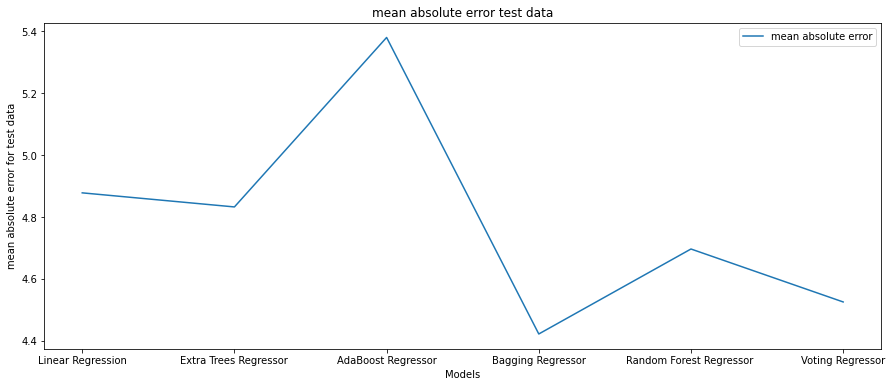

In [399]:
plt.figure(figsize=[15,6])
mae = absolute_error_sonuc['Model']
plt.plot(mae, absolute_error_sonuc['mean_absolute_error'], label = 'mean absolute error')
plt.legend()
plt.title('mean absolute error test data')
plt.xlabel('Models')
plt.ylabel('mean absolute error for test data')
plt.show()

# mean absolute error for train data

In [400]:
absolute_error_sonuct = pd.DataFrame({
    'Model': ['Linear Regression', 'Extra Trees Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'Random Forest Regressor ','Voting Regressor'],
    'mean_absolute_error': [lmaet, etmaet, abmaet, bgmaet, rfmaet, vrmaet]})

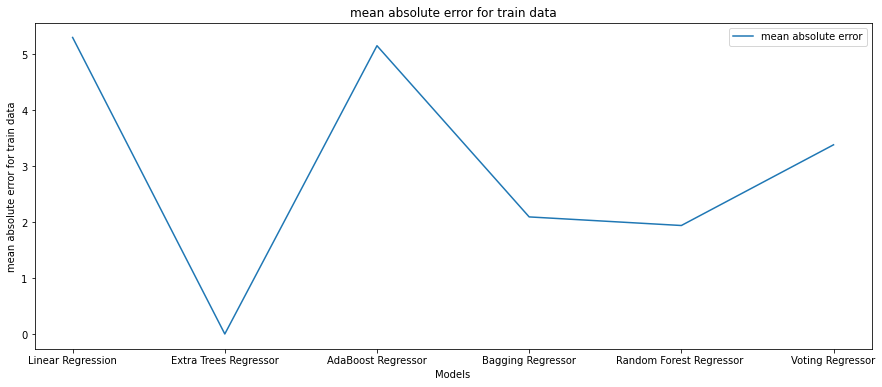

In [401]:
plt.figure(figsize=[15,6])
maet = absolute_error_sonuct['Model']
plt.plot(maet, absolute_error_sonuct['mean_absolute_error'], label = 'mean absolute error')
plt.legend()
plt.title('mean absolute error for train data')
plt.xlabel('Models')
plt.ylabel('mean absolute error for train data')
plt.show()

# mean squared error for test data

In [402]:
squared_error_sonuc = pd.DataFrame({
    'Model': ['Linear Regression', 'Extra Trees Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'Random Forest Regressor ','Voting Regressor'],
    'mean_squared_error': [lmse, etmse, abmse, bgmse, rfmse, vrmse]})

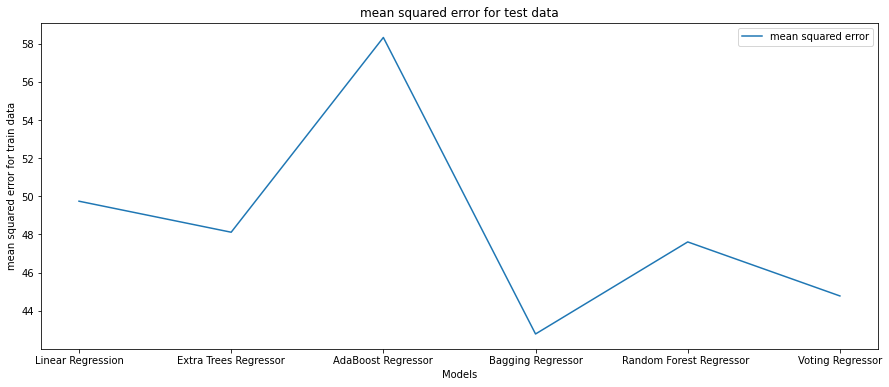

In [403]:
plt.figure(figsize=[15,6])
mse = squared_error_sonuc['Model']
plt.plot(mse, squared_error_sonuc['mean_squared_error'], label = 'mean squared error')
plt.legend()
plt.title('mean squared error for test data')
plt.xlabel('Models')
plt.ylabel('mean squared error for train data')
plt.show()

# mean squared error for train data

In [404]:
squared_error_sonuct = pd.DataFrame({
    'Model': ['Linear Regression', 'Extra Trees Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'Random Forest Regressor ','Voting Regressor'],
    'mean_squared_error': [lmset, etmset, abmset, bgmset, rfmset, vrmset]})

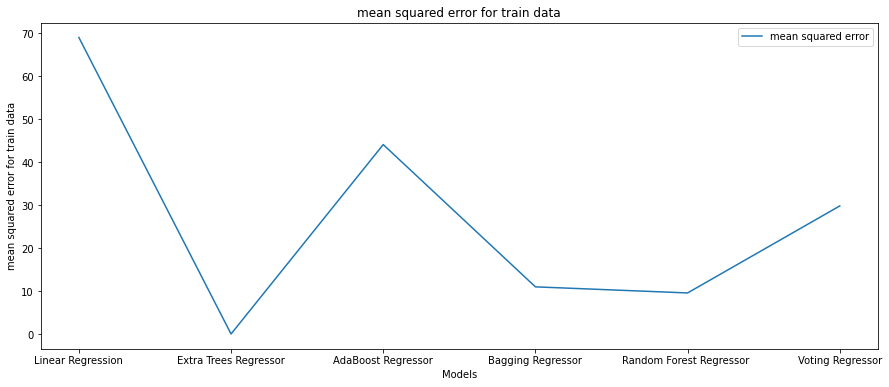

In [405]:
plt.figure(figsize=[15,6])
mset = squared_error_sonuct['Model']
plt.plot(mset, squared_error_sonuct['mean_squared_error'], label = 'mean squared error')
plt.legend()
plt.title('mean squared error for train data')
plt.xlabel('Models')
plt.ylabel('mean squared error for train data')
plt.show()

# r2 score for test data

In [406]:
r2_score_sonuc = pd.DataFrame({
    'Model': ['Linear Regression', 'Extra Trees Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'Random Forest Regressor ','Voting Regressor'],
    'r2_score': [lr2, etr2, abr2, brr2, rfr2, vrr2]})

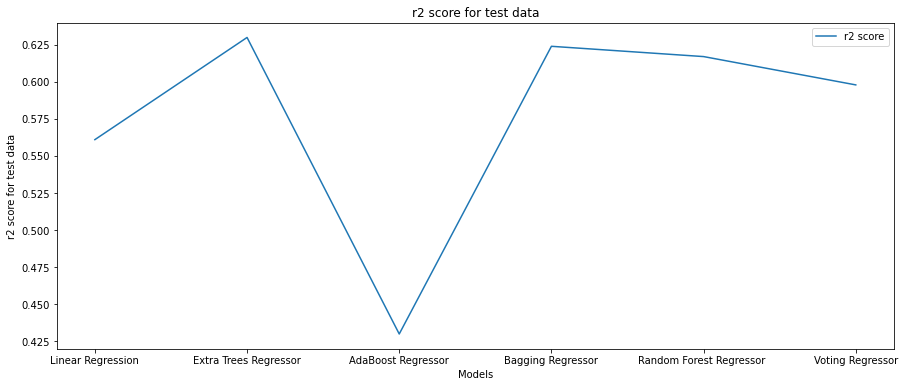

In [407]:
plt.figure(figsize=[15,6])
r2 = r2_score_sonuc['Model']
plt.plot(r2, r2_score_sonuc['r2_score'], label = 'r2 score')
plt.legend()
plt.title('r2 score for test data')
plt.xlabel('Models')
plt.ylabel('r2 score for test data')
plt.show()

# r2 score for train data

In [408]:
r2_score_sonuct = pd.DataFrame({
    'Model': ['Linear Regression', 'Extra Trees Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'Random Forest Regressor ','Voting Regressor'],
    'r2_score': [lr2t, etr2t, abr2t, brr2t, rfr2t, vrr2t]})

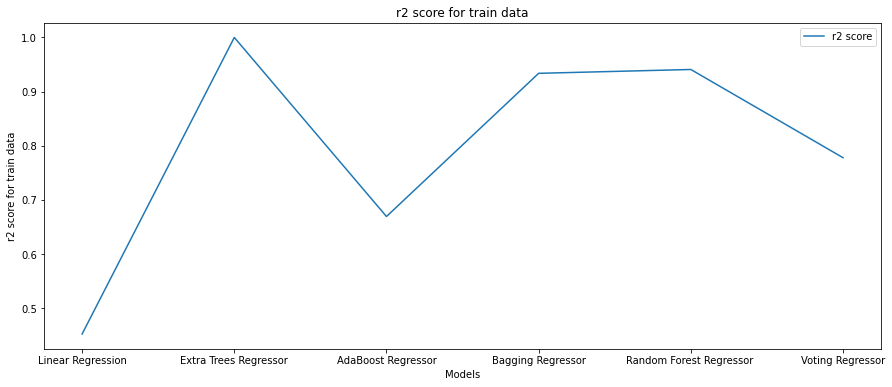

In [409]:
plt.figure(figsize=[15,6])
r2t = r2_score_sonuct['Model']
plt.plot(r2t, r2_score_sonuct['r2_score'], label = 'r2 score')
plt.legend()
plt.title('r2 score for train data')
plt.xlabel('Models')
plt.ylabel('r2 score for train data')
plt.show()